In [1]:
import numpy as np
from numpy.linalg import norm


In [2]:
#class Kmeans:
#    '''Implementing Kmeans algorithm.'''
#
#    def __init__(self, n_clusters, max_iter=100, random_state=123):
#        self.n_clusters = n_clusters
#        self.max_iter = max_iter
#        self.random_state = random_state
#
#    def initializ_centroids(self, X):
#        np.random.RandomState(self.random_state)
#        random_idx = np.random.permutation(X.shape[0])
#        centroids = X[random_idx[:self.n_clusters]]
#        return centroids
#
#    def compute_centroids(self, X, labels):
#        centroids = np.zeros((self.n_clusters, X.shape[1]))
#        for k in range(self.n_clusters):
#            centroids[k, :] = np.mean(X[labels == k, :], axis=0)
#        return centroids
#
#    def compute_distance(self, X, centroids):
#        distance = np.zeros((X.shape[0], self.n_clusters))
#        for k in range(self.n_clusters):
#            row_norm = norm(X - centroids[k, :], axis=1)
#            distance[:, k] = np.square(row_norm)
#        return distance
#
#    def find_closest_cluster(self, distance):
#        return np.argmin(distance, axis=1)
#
#    def compute_sse(self, X, labels, centroids):
#        distance = np.zeros(X.shape[0])
#        for k in range(self.n_clusters):
#            distance[labels == k] = norm(X[labels == k] - centroids[k], axis=1)
#        return np.sum(np.square(distance))
#    
#    def fit(self, X):
#        self.centroids = self.initializ_centroids(X)
#        for i in range(self.max_iter):
#            old_centroids = self.centroids
#            distance = self.compute_distance(X, old_centroids)
#            self.labels = self.find_closest_cluster(distance)
#            self.centroids = self.compute_centroids(X, self.labels)
#            if np.all(old_centroids == self.centroids):
#                break
#        self.error = self.compute_sse(X, self.labels, self.centroids)
#    
#    def predict(self, X):
#        distance = self.compute_distance(X, self.centroids)
#        return self.find_closest_cluster(distance)

In [3]:
#import matplotlib.pyplot as plt
#from matplotlib.image import imread
#import pandas as pd
#import seaborn as sns
#from sklearn.datasets import (make_blobs,
#                                                make_circles,
#                                                make_moons)
#from sklearn.cluster import KMeans, SpectralClustering
#from sklearn.preprocessing import StandardScaler
#from sklearn.metrics import silhouette_samples, silhouette_score
#
#%matplotlib inline
#sns.set_context('notebook')
#plt.style.use('fivethirtyeight')
#from warnings import filterwarnings
#filterwarnings('ignore')

In [109]:
# Import the data
df = pd.read_csv('Untitled.txt')
df.head()

,Unnamed: 0,iso_code,location,continent,date,new_cases_per_million,new_cases_smoothed_per_million,stringency_index,positive_rate,human_development_index,cost_living_index,tourist_service_index,international_travel_controls
0,0,ALB,Albania,Europe,2020-02-25,NaN,NaN,8.33,NaN,0.795,35.5,4.01,1.0
1,1,ALB,Albania,Europe,2020-02-26,NaN,NaN,8.33,NaN,0.795,35.5,4.01,1.0
2,2,ALB,Albania,Europe,2020-02-27,NaN,NaN,8.33,NaN,0.795,35.5,4.01,1.0
3,3,ALB,Albania,Europe,2020-02-28,NaN,NaN,8.33,NaN,0.795,35.5,4.01,1.0
4,4,ALB,Albania,Europe,2020-02-29,NaN,NaN,8.33,NaN,0.795,35.5,4.01,1.0


In [110]:
df.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [111]:
df.shape

(88607, 12)

In [112]:
df.isnull().sum()

iso_code                              0
location                              0
continent                             0
date                                  0
new_cases_per_million               510
new_cases_smoothed_per_million     1612
stringency_index                   3422
positive_rate                     24328
human_development_index             801
cost_living_index                     0
tourist_service_index              2213
international_travel_controls      2493
dtype: int64

In [113]:
df = df.fillna(df.mean())

In [114]:
df.isnull().sum()

iso_code                          0
location                          0
continent                         0
date                              0
new_cases_per_million             0
new_cases_smoothed_per_million    0
stringency_index                  0
positive_rate                     0
human_development_index           0
cost_living_index                 0
tourist_service_index             0
international_travel_controls     0
dtype: int64

In [115]:
df.head()

,iso_code,location,continent,date,new_cases_per_million,new_cases_smoothed_per_million,stringency_index,positive_rate,human_development_index,cost_living_index,tourist_service_index,international_travel_controls
0,ALB,Albania,Europe,2020-02-25,207.814059,207.092998,8.33,0.101155,0.795,35.5,4.01,1.0
1,ALB,Albania,Europe,2020-02-26,207.814059,207.092998,8.33,0.101155,0.795,35.5,4.01,1.0
2,ALB,Albania,Europe,2020-02-27,207.814059,207.092998,8.33,0.101155,0.795,35.5,4.01,1.0
3,ALB,Albania,Europe,2020-02-28,207.814059,207.092998,8.33,0.101155,0.795,35.5,4.01,1.0
4,ALB,Albania,Europe,2020-02-29,207.814059,207.092998,8.33,0.101155,0.795,35.5,4.01,1.0


In [116]:
df.describe()

,new_cases_per_million,new_cases_smoothed_per_million,stringency_index,positive_rate,human_development_index,cost_living_index,tourist_service_index,international_travel_controls
count,88607.000000,88607.000000,88607.000000,88607.000000,88607.000000,88607.000000,88607.000000,88607.000000
mean,207.814059,207.092998,56.776273,0.101155,0.786191,49.547125,4.351062,2.553209
std,639.968925,547.437025,19.728741,0.097280,0.122611,19.184936,1.241738,1.049724
min,0.000000,0.000000,0.000000,0.000000,0.470000,19.920000,1.730000,0.000000
25%,2.716500,5.632000,44.440000,0.031200,0.718000,34.770000,3.340000,2.000000
50%,33.040000,43.100000,56.776273,0.101155,0.806000,44.080000,4.420000,3.000000
75%,164.504000,189.994000,71.300000,0.103200,0.890000,62.810000,5.370000,3.000000
max,26186.094000,10968.157000,100.000000,0.991200,0.957000,123.350000,6.700000,4.000000


In [117]:
df['location'].unique()

array(['Albania', 'Algeria', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahrain', 'Bangladesh', 'Barbados',
       'Belgium', 'Bolivia', 'Botswana', 'Brazil', 'Bulgaria', 'Cambodia',
       'Cameroon', 'Canada', 'Chile', 'China', 'Colombia', 'Costa Rica',
       'Croatia', 'Cyprus', 'Denmark', 'Dominican Republic', 'Ecuador',
       'Egypt', 'El Salvador', 'Estonia', 'Ethiopia', 'Finland', 'France',
       'Georgia', 'Germany', 'Ghana', 'Greece', 'Guatemala', 'Honduras',
       'Hong Kong', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran',
       'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Jordan',
       'Kazakhstan', 'Kenya', 'Kuwait', 'Latvia', 'Lebanon', 'Lithuania',
       'Luxembourg', 'Malaysia', 'Malta', 'Mauritius', 'Mexico',
       'Moldova', 'Mongolia', 'Montenegro', 'Morocco', 'Myanmar', 'Nepal',
       'Netherlands', 'New Zealand', 'Nicaragua', 'Nigeria',
       'North Macedonia', 'Norway', 'Oman', 'Pakistan', 'Panama',
       'Paraguay'

In [118]:
len(df['location'].unique())# view how many different types of variables are there

116

In [119]:
df['continent'].unique()

array(['Europe', 'Africa', 'South America', 'Asia', 'Oceania',
       'North America'], dtype=object)

In [120]:
len(df['date'].unique())

816

In [121]:
df.drop(['continent'],axis=1,inplace = True)

In [122]:
df.sort_values(['date'], ascending=True)

,iso_code,location,date,new_cases_per_million,new_cases_smoothed_per_million,stringency_index,positive_rate,human_development_index,cost_living_index,tourist_service_index,international_travel_controls
46638,MEX,Mexico,2020-01-01,207.814059,207.092998,0.000000,0.101155,0.779,35.35,4.81,0.000000
1522,ARG,Argentina,2020-01-01,207.814059,207.092998,0.000000,0.101155,0.845,34.69,4.53,0.000000
1523,ARG,Argentina,2020-01-02,207.814059,207.092998,0.000000,0.101155,0.845,34.69,4.53,0.000000
46639,MEX,Mexico,2020-01-02,207.814059,207.092998,0.000000,0.101155,0.779,35.35,4.81,0.000000
1524,ARG,Argentina,2020-01-03,207.814059,207.092998,0.000000,0.101155,0.845,34.69,4.53,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
25262,FRA,France,2022-03-26,2069.310000,1829.784000,56.776273,0.101155,0.901,74.13,5.69,2.553209
24469,FIN,Finland,2022-03-26,207.814059,207.092998,56.776273,0.101155,0.938,73.20,4.66,2.000000
23681,ETH,Ethiopia,2022-03-26,0.059000,0.206000,56.776273,0.101155,0.485,47.49,1.73,1.000000
22154,SLV,El Salvador,2022-03-26,0.000000,0.000000,56.776273,0.101155,0.673,44.37,3.08,2.553209


In [123]:
# aggregate data from 2022-01-01 to 2022-03-26

In [124]:
df["date"] = pd.to_datetime(df["date"])

In [125]:
recent = (df['date'] >= '2022-01-01') & (df['date'] < '2022-03-26')
recent_df = df.loc[recent]
recent_df.head()

,iso_code,location,date,new_cases_per_million,new_cases_smoothed_per_million,stringency_index,positive_rate,human_development_index,cost_living_index,tourist_service_index,international_travel_controls
676,ALB,Albania,2022-01-01,0.000,133.363,46.30,0.1005,0.795,35.5,4.01,3.0
677,ALB,Albania,2022-01-02,230.078,157.927,46.30,0.1201,0.795,35.5,4.01,3.0
678,ALB,Albania,2022-01-03,0.000,157.927,46.30,0.1190,0.795,35.5,4.01,3.0
679,ALB,Albania,2022-01-04,395.415,182.442,43.52,0.1335,0.795,35.5,4.01,2.0
680,ALB,Albania,2022-01-05,0.000,155.242,43.52,0.1134,0.795,35.5,4.01,2.0


In [126]:
recent_df = recent_df.drop(columns=['iso_code',"date"])
recent_df.head()

,location,new_cases_per_million,new_cases_smoothed_per_million,stringency_index,positive_rate,human_development_index,cost_living_index,tourist_service_index,international_travel_controls
676,Albania,0.000,133.363,46.30,0.1005,0.795,35.5,4.01,3.0
677,Albania,230.078,157.927,46.30,0.1201,0.795,35.5,4.01,3.0
678,Albania,0.000,157.927,46.30,0.1190,0.795,35.5,4.01,3.0
679,Albania,395.415,182.442,43.52,0.1335,0.795,35.5,4.01,2.0
680,Albania,0.000,155.242,43.52,0.1134,0.795,35.5,4.01,2.0


In [127]:
agg_df = recent_df.groupby("location").agg({'new_cases_per_million':'sum','stringency_index':'mean','positive_rate':'mean',"cost_living_index":"mean", "tourist_service_index":"mean", "international_travel_controls":"mean"})
agg_df.head()

,new_cases_per_million,stringency_index,positive_rate,cost_living_index,tourist_service_index,international_travel_controls
location,,,,,,
Albania,21961.522000,54.216774,0.345190,35.50,4.01,2.441492
Algeria,1057.456000,59.444391,0.101155,26.87,1.84,2.984043
Argentina,73881.004000,35.885180,0.302266,34.69,4.53,2.026343
Armenia,26108.377000,56.776273,0.151788,33.89,4.33,2.553209
Australia,149025.940118,53.544867,0.298262,77.75,6.06,3.000000


In [128]:
agg_df.info

<bound method DataFrame.info of            new_cases_per_million  stringency_index  positive_rate  \
location                                                            
Albania             21961.522000         54.216774       0.345190   
Algeria              1057.456000         59.444391       0.101155   
Argentina           73881.004000         35.885180       0.302266   
Armenia             26108.377000         56.776273       0.151788   
Australia          149025.940118         53.544867       0.298262   
...                          ...               ...            ...   
Venezuela            2626.826000         35.775392       0.101155   
Vietnam             71611.277000         65.800775       0.323516   
Yemen                  55.003000         14.566965       0.101155   
Zambia               3284.673000         34.485702       0.129762   
Zimbabwe             2145.946000         49.087203       0.096785   

           cost_living_index  tourist_service_index  \
location       

In [129]:
X = agg_df

In [130]:
cols = X.columns

In [131]:
# Feature Scaling 
from sklearn.preprocessing import MinMaxScaler

ms = MinMaxScaler()

X = ms.fit_transform(X)

In [132]:
X = pd.DataFrame(X, columns=[cols])

In [133]:
X.head()

,new_cases_per_million,stringency_index,positive_rate,cost_living_index,tourist_service_index,international_travel_controls
0,0.053458,0.625995,0.593745,0.150633,0.458753,0.517185
1,0.002510,0.697311,0.169147,0.067195,0.022133,0.685264
2,0.179998,0.375912,0.519061,0.142802,0.563380,0.388575
3,0.063565,0.660912,0.257243,0.135067,0.523139,0.551794
4,0.363144,0.616829,0.512095,0.559122,0.871227,0.690207


In [134]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=10, random_state=0) 

kmeans.fit(X)

KMeans(n_clusters=10, random_state=0)

In [135]:
kmeans.fit_predict(X)

array([4, 0, 4, 0, 8, 5, 0, 3, 6, 3, 8, 4, 9, 0, 3, 6, 6, 1, 4, 0, 0, 3,
       8, 5, 5, 9, 4, 6, 9, 2, 6, 8, 8, 2, 1, 6, 3, 4, 9, 1, 4, 5, 0, 0,
       0, 8, 8, 1, 3, 1, 4, 0, 0, 0, 2, 3, 2, 8, 3, 1, 3, 4, 6, 9, 3, 0,
       0, 6, 7, 1, 9, 6, 0, 7, 0, 0, 3, 4, 3, 0, 4, 2, 1, 4, 0, 6, 3, 9,
       4, 3, 1, 2, 2, 9, 8, 8, 6, 0, 8, 7, 3, 9, 3, 4, 3, 6, 0, 3, 3, 1,
       8, 0, 4, 9, 6, 6])

In [136]:
kmeans.cluster_centers_

array([[0.04213674, 0.68279465, 0.21249744, 0.14553541, 0.36813722,
        0.64590137],
       [0.22144282, 0.73691596, 0.23060319, 0.5028425 , 0.77867203,
        0.79125842],
       [0.52270611, 0.47795404, 0.52303986, 0.25554896, 0.68008048,
        0.26916809],
       [0.16576355, 0.59463722, 0.19245376, 0.31130131, 0.68835181,
        0.30125597],
       [0.11223022, 0.48921106, 0.47285619, 0.16890006, 0.46478873,
        0.31936023],
       [0.80366078, 0.42599945, 0.16111787, 0.55440878, 0.81539235,
        0.29282336],
       [0.00985214, 0.50446392, 0.14811572, 0.15214569, 0.16369646,
        0.21224484],
       [0.56285138, 0.48950703, 0.86821696, 0.7739534 , 0.73775989,
        0.47015536],
       [0.37308525, 0.47865642, 0.49996132, 0.4859164 , 0.77448021,
        0.59639143],
       [0.02816778, 0.22600257, 0.21824109, 0.21293629, 0.31589537,
        0.07314732]])

In [137]:
kmeans.inertia_

9.297267034339828

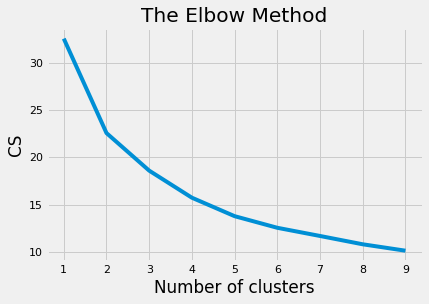

In [138]:
from sklearn.cluster import KMeans
cs = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 10), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

In [139]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=0) 

kmeans.fit(X)

KMeans(n_clusters=5, random_state=0)

In [140]:
kmeans.inertia_

13.766419206984235

In [141]:
kmeans.fit_predict(X)

array([4, 2, 4, 2, 3, 0, 2, 4, 1, 0, 3, 4, 1, 2, 4, 1, 1, 3, 4, 2, 2, 4,
       4, 0, 0, 4, 4, 1, 1, 0, 1, 4, 3, 4, 3, 1, 0, 4, 1, 3, 4, 0, 2, 2,
       2, 3, 3, 3, 2, 3, 4, 2, 2, 2, 0, 1, 4, 3, 2, 3, 4, 4, 1, 1, 2, 2,
       2, 1, 3, 3, 1, 1, 2, 0, 2, 2, 4, 4, 2, 2, 4, 0, 2, 4, 2, 1, 2, 1,
       4, 0, 3, 4, 0, 1, 3, 3, 1, 2, 3, 3, 4, 1, 4, 4, 4, 1, 2, 4, 0, 3,
       4, 2, 4, 1, 1, 1])

In [142]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=0) 

kmeans.fit(X)

KMeans(n_clusters=4, random_state=0)

In [143]:
kmeans.inertia_

15.720130484454204

In [144]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=9, random_state=0) 

kmeans.fit(X)

KMeans(n_clusters=9, random_state=0)

In [145]:
kmeans.inertia_

10.11181796598939

In [146]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0) 

kmeans.fit(X)

KMeans(n_clusters=2, random_state=0)

In [147]:
kmeans.inertia_

22.563497163807515

In [148]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=8, random_state=0) 

kmeans.fit(X)

KMeans(random_state=0)

In [149]:
kmeans.inertia_

10.789469425752364

In [150]:
#choose k = 10

In [151]:
# recall that part
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=10, random_state=0) 

kmeans.fit(X)

KMeans(n_clusters=10, random_state=0)

In [152]:
clusters = kmeans.fit_predict(X)

In [159]:
agg_df["Clusters"] =clusters
agg_df.head()

,new_cases_per_million,stringency_index,positive_rate,cost_living_index,tourist_service_index,international_travel_controls,Clusters
location,,,,,,,
Albania,21961.522000,54.216774,0.345190,35.50,4.01,2.441492,4
Algeria,1057.456000,59.444391,0.101155,26.87,1.84,2.984043,0
Argentina,73881.004000,35.885180,0.302266,34.69,4.53,2.026343,4
Armenia,26108.377000,56.776273,0.151788,33.89,4.33,2.553209,0
Australia,149025.940118,53.544867,0.298262,77.75,6.06,3.000000,8


In [160]:
C1 = agg_df[agg_df['Clusters'] == 1]

In [161]:
C1

,new_cases_per_million,stringency_index,positive_rate,cost_living_index,tourist_service_index,international_travel_controls,Clusters
location,,,,,,,
Canada,32091.830,73.161489,0.170344,70.22,6.08,4.000000,1
Germany,146537.011,81.632159,0.143740,65.58,5.95,3.000000,1
Hong Kong,145506.301,67.616190,0.098769,80.71,4.27,3.000000,1
Italy,134241.368,72.871667,0.130703,66.47,6.01,2.702381,1
Japan,36125.103,47.561295,0.306584,77.03,5.71,4.000000,1
Malta,46277.850,52.131489,0.089607,67.84,5.47,3.000000,1
New Zealand,111844.605,57.646132,0.101155,74.52,5.80,4.000000,1
Qatar,37567.000,57.948723,0.101155,62.81,5.03,2.761905,1
Singapore,143266.463,57.599423,0.081554,83.98,5.12,2.797619,1


In [162]:
C2 = agg_df[agg_df['Clusters'] == 2]

In [163]:
C2

,new_cases_per_million,stringency_index,positive_rate,cost_living_index,tourist_service_index,international_travel_controls,Clusters
location,,,,,,,
Estonia,232710.377,53.177680,0.418044,53.68,5.41,2.000000,2
Georgia,178542.844,47.142829,0.308662,30.18,4.89,1.720872,2
Latvia,273335.850,39.817442,0.337994,48.45,4.51,1.000000,2
Lithuania,182224.587,38.363083,0.384026,45.65,4.42,1.834349,2
Portugal,210894.299,30.151251,0.150862,47.94,6.70,1.500000,2
Slovakia,188786.756,46.756727,0.239684,44.68,4.42,2.026343,2
Slovenia,234966.853,48.146429,0.292597,53.88,5.42,1.404762,2


In [ ]:
# ...